In [1]:
#load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#load the dataset
df = pd.read_csv("data/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
#check for the null column count
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
#drop irrelevant data
df = df.drop(['Date', 'Location'], axis=1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
#impute impantance features
impute_col = ["Sunshine", "Evaporation", "Cloud9am", "Cloud3pm"]
impute = SimpleImputer(strategy='mean')
df[impute_col] = impute.fit_transform(df[impute_col])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [7]:
#check the unique categories on the RainTomorrow column
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
#drop missing value
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        112925 non-null  float64
 1   MaxTemp        112925 non-null  float64
 2   Rainfall       112925 non-null  float64
 3   Evaporation    112925 non-null  float64
 4   Sunshine       112925 non-null  float64
 5   WindGustDir    112925 non-null  object 
 6   WindGustSpeed  112925 non-null  float64
 7   WindDir9am     112925 non-null  object 
 8   WindDir3pm     112925 non-null  object 
 9   WindSpeed9am   112925 non-null  float64
 10  WindSpeed3pm   112925 non-null  float64
 11  Humidity9am    112925 non-null  float64
 12  Humidity3pm    112925 non-null  float64
 13  Pressure9am    112925 non-null  float64
 14  Pressure3pm    112925 non-null  float64
 15  Cloud9am       112925 non-null  float64
 16  Cloud3pm       112925 non-null  float64
 17  Temp9am        112925 non-null  fl

In [9]:
#convert categories data to numeric
df_col = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in df_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype('str'))

df['RainTomorrow'].unique()


array([0, 1])

In [10]:
#define features and target
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [11]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [12]:
#initialize our model
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#predict label
y_pred = rf_model.predict(X_test)

In [14]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['No', 'Yes']))

Accuracy Score: 0.8602169581580695

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.96      0.91     17524
         Yes       0.78      0.53      0.63      5061

    accuracy                           0.86     22585
   macro avg       0.83      0.74      0.77     22585
weighted avg       0.85      0.86      0.85     22585



Text(0.5, 1.0, 'Confusion Matrix')

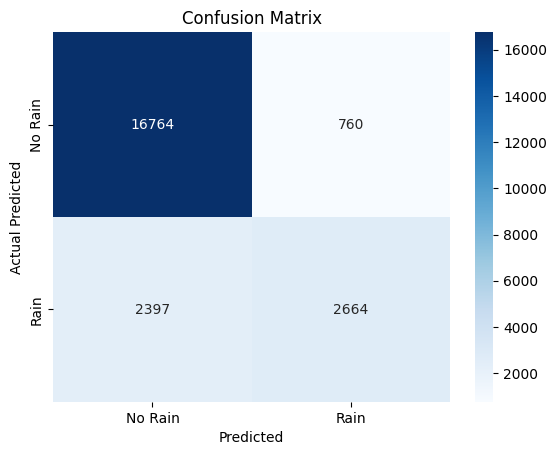

In [15]:
#confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, 
    cmap='Blues', fmt='d', 
    xticklabels=['No Rain', 'Rain'], 
    yticklabels=['No Rain', 'Rain']
)
plt.xlabel('Predicted')
plt.ylabel('Actual Predicted')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Most Features Used')

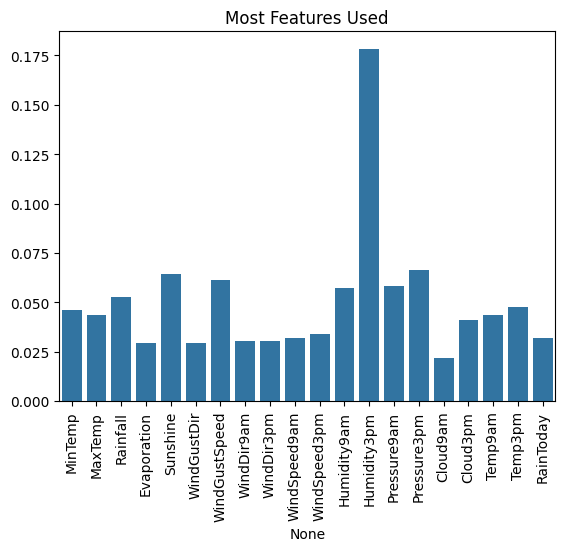

In [17]:
#most important features
importance = rf_model.feature_importances_
feature_names = X.columns

sns.barplot(x=feature_names, y=importance)
plt.xticks(rotation=90)
plt.title('Most Features Used')